In [42]:
%matplotlib inline
%autoreload 2 

In [18]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)

In [33]:
import george
import pandas as pd
from george.kernels import (KappaKappaExpSquaredKernel, 
                            Gamma1Gamma1ExpSquaredKernel,
                            KappaGamma1ExpSquaredKernel,
                            ExpSquaredKernel)

In [43]:
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as plot

In [21]:
truth = (0.5, .5)  # 0.5 = inv_lambda, 1.0 = beta
spacing = 0.1
rng = (0, 1.0)

# coords = [[i, 0] for 
KKkernel = KappaKappaExpSquaredKernel
SqExkernel = ExpSquaredKernel

In [22]:
data = \
    fit.generate_2D_data(truth, spacing, KKkernel, rng=rng)

In [23]:
ExpSqdata = \
    fit.generate_2D_data(truth, spacing, SqExkernel, rng=rng)

In [24]:
coords, psi, psi_err = ExpSqdata

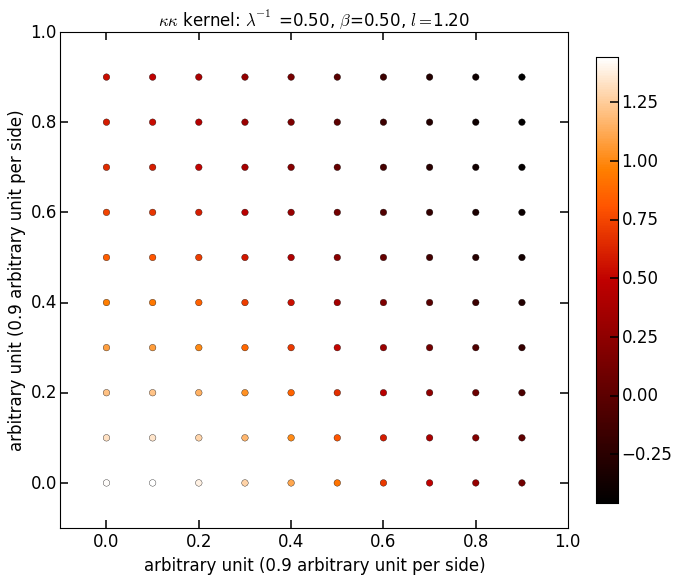

In [44]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth,
                       kernel_name=r"$\kappa\kappa$")

In [26]:
coords, psi, psi_err = data

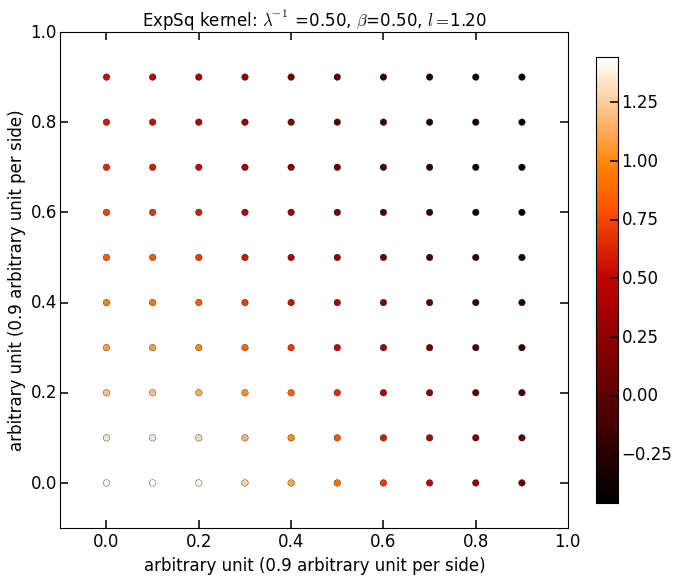

In [27]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth)

In [31]:
sampler, p0 = fit.fit_gp(np.log((0.5, 0.5)), data)

Initial guesses were [ 0.49999983  0.49999975]
Initial guesses were [ 0.49999982  0.50000024]
Initial guesses were [ 0.50000023  0.49999966]
Initial guesses were [ 0.49999982  0.50000005]
Initial guesses were [ 0.50000014  0.50000005]
Initial guesses were [ 0.49999932  0.50000058]
Initial guesses were [ 0.49999976  0.50000063]
Initial guesses were [ 0.49999972  0.50000042]
Running burn-in with length 1000
Running second burn-in with length 1000
Running production chain with length 5000
the optimized p0 values are 
[[-0.84595771 -0.81902047]
 [-1.2571083  -0.91267378]
 [-1.19745039 -0.9266796 ]
 [-0.73750615 -0.81570582]
 [-0.64334227 -0.82150997]
 [-1.27689905 -0.89315771]
 [-0.86758577 -0.86166727]
 [-1.67724364 -0.96589558]]


In [29]:
np.log((0.5, 1))

array([-0.69314718,  0.        ])

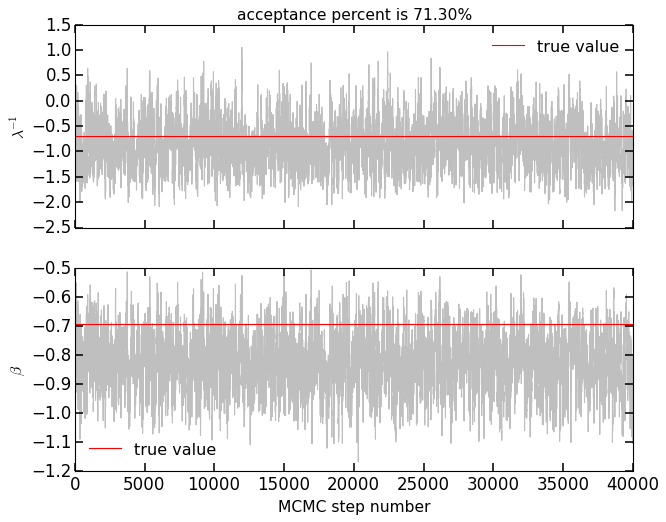

In [32]:
plot.trace_plot(sampler, labels=[r"$\lambda^{-1}$", r"$\beta$"],
                truth=np.log(truth))

In [36]:
sampler.sample.

<bound method EnsembleSampler.sample of <emcee.ensemble.EnsembleSampler object at 0x10ace7b10>>

N_bins = knuth
Optimization terminated successfully.
         Current function value: -24964.918490
         Iterations: 17
         Function evaluations: 49
N_bins = knuth
Optimization terminated successfully.
         Current function value: -23171.519157
         Iterations: 17
         Function evaluations: 47


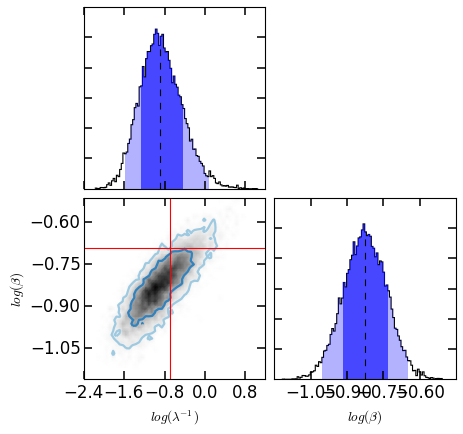

In [46]:
_  = plot.N_by_N_lower_triangle_plot(sampler.flatchain.transpose(), 
                                     0.05, [0, 1],
                                    truth=np.log(truth), 
                                     axlabels=
                                     [r"$log(\lambda^{-1})$", 
                                      r"$log(\beta)$"])